In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import csv
from datetime import datetime
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

In [ ]:
#loading the data into dataframe
# We have combined the 10 files into one to better handle the data
df = pd.DataFrame(pd.read_csv('./cib_combined_data.csv'))
df.head()

In [ ]:
#To not have compilation error due to the NaN values comparison with integer numbers in the future
#Decided to fill all Nan values with zeros (zero imputation)
df=df.fillna(0)
df.head(10)

In [ ]:
df.dtypes

In [ ]:
df[df["AGE"]<18].count()

In [ ]:
df_group= df.groupby(df['CUSTOMER_ID'], as_index=False)
df_group.head(10)

In [ ]:
#first approach of cleaning data is dropping duplicate entries
df.drop_duplicates(inplace= True)
df.info()
#as we see there is no duplicates in the original data

In [ ]:
# # This cell should be deleted later 
# # This is to make sure there is no issues with the text attributes(spaces might ruin data analysis)
# male_count = df[df["GENDER"]=="MALE"].count()
# female_count= df[df["GENDER"]=="FEMALE"].count()
# no_gender_count=  df[df["GENDER"].isnull()==True].count()
# total_count= male_count + female_count + no_gender_count
# print(total_count)
# # df.GENDER.unique()

In [ ]:
# We need to graph now the relation between the total cash amount vs total retail amount 
L = ['CUSTOMER_ID', 'CARD_ID','Total_Retail_Transaction_Amount.*','Total_Cash_Transaction_Amount.*']
df_filter = pd.DataFrame({x: df.filter(regex=x).sum(axis=1) for x in L})
df_filter.head()

In [ ]:
df_filter.tail(30)
df_filter.to_csv(r'.\total_retail_cash.csv', index = False, header=True)

In [ ]:
# We need to graph now the relation between the total cash amount  vs total retail amount  
# for all quarters
# this is to determine cash percentage with respect to the credit percentage
reg= 'Total_.*_Transaction_Amount.*|^CUSTOMER_ID|^CARD_ID'
df_filter_cash_retail_points = df.filter(regex=reg)
df_filter_cash_retail_points.tail(30)
df_filter_cash_retail_points.info()

In [ ]:
# df_filter_cash_retail_points.to_csv(r'.\total_retail_cash_per_quarter.csv', index = False, header=True)

In [ ]:
df_filter_cash_retail_points_sum= pd.DataFrame(df_filter_cash_retail_points.sum())
df_filter_cash_retail_points_sum

In [ ]:
#creating lists for visualization
df_list= df_filter_cash_retail_points_sum.values.tolist()
df_final_list= []
for mylist in df_list: 
    df_final_list = df_final_list + mylist
    
df_final_list

retail_list = df_final_list [2:6] + df_final_list [10:14]
cash_list = df_final_list [6:10] + df_final_list [14:18]

print (df_final_list)
print (retail_list)
print (cash_list)

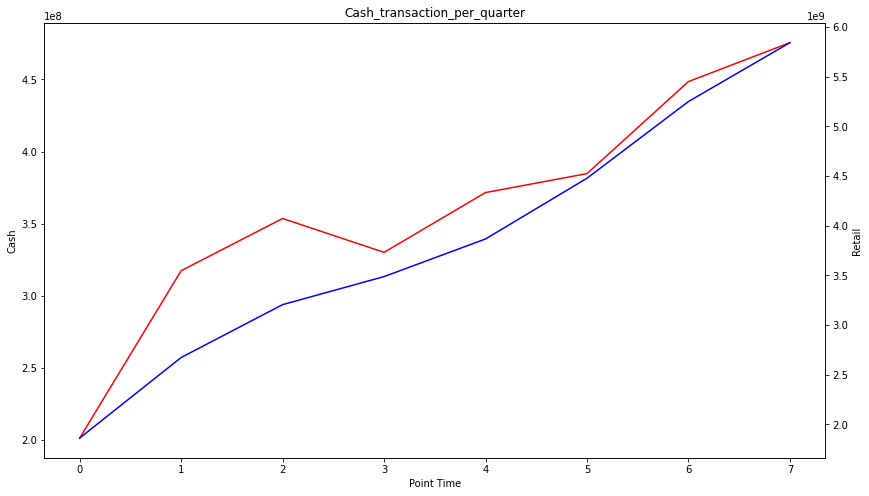

In [316]:
# Retail vs Cash Visualization
arr= np.arange(8)
fig, cash_ax = plt.subplots()
fig.set_size_inches(14, 8)
retail_ax = cash_ax.twinx()
cash_ax.set_title("Cash_transaction_per_quarter")
cash_ax.set_xlabel("Point Time")
cash_ax.set_ylabel("Cash")
retail_ax.set_ylabel("Retail")
temp_lines = cash_ax.plot(arr,cash_list, color='r')
humidity_lines = retail_ax.plot(arr, retail_list, color='b')
plt.savefig('cash_vs_retail.png')

In [153]:
# We need to graph now the relation between the different MGs with amount and count
L = ['CUSTOMER_ID', 'CARD_ID',\
     'Count.*Airline.*', 'Count.*Accomodation.*', 'Count.*Clothing_and_Apparel.*', 'Count.*Education.*',\
     'Count.*FoodStoresRestaurants.*', 'Count.*GeneralRetail.*', 'Count.*GovernmentLegal.*', 'Count.*GroceryStoresSupermarkets.*',\
     'Count.*Healthcare.*', 'Count.*HomeConstruction.*', 'Count.*Jewelery.*', 'Count.*Professional_and_CommercialServices.*',\
     'Count.*Sports_and_Leisure.*', 'Count.*TelecomServices.*', 'Count.*Transport.*', 'Count.*Electronics.*',\
     'Amount.*Airline.*', 'Amount.*Accomodation.*', 'Amount.*Clothing_and_Apparel.*', 'Amount.*Education.*',\
     'Amount.*FoodStoresRestaurants.*', 'Amount.*GeneralRetail.*', 'Amount.*GovernmentLegal.*', 'Amount.*GroceryStoresSupermarkets.*',\
     'Amount.*Healthcare.*', 'Amount.*HomeConstruction.*', 'Amount.*Jewelery.*', 'Amount.*Professional_and_CommercialServices.*',\
     'Amount.*Sports_and_Leisure.*', 'Amount.*TelecomServices.*', 'Amount.*Transport.*', 'Amount.*Electronics.*']
df_filter_mg = pd.DataFrame({x: df.filter(regex=x).sum(axis=1) for x in L})
df_filter_mg.head()

,CUSTOMER_ID,CARD_ID,Count.*Airline.*,Count.*Accomodation.*,Count.*Clothing_and_Apparel.*,Count.*Education.*,Count.*FoodStoresRestaurants.*,Count.*GeneralRetail.*,Count.*GovernmentLegal.*,Count.*GroceryStoresSupermarkets.*,...,Amount.*GovernmentLegal.*,Amount.*GroceryStoresSupermarkets.*,Amount.*Healthcare.*,Amount.*HomeConstruction.*,Amount.*Jewelery.*,Amount.*Professional_and_CommercialServices.*,Amount.*Sports_and_Leisure.*,Amount.*TelecomServices.*,Amount.*Transport.*,Amount.*Electronics.*
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9640.0,0.0,0.0
1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8800.0,0.0,0.0
2,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5745.0


In [170]:
df_mg_sum=pd.DataFrame(df_filter.sum())
df_mg_dict= df_mg_sum.to_dict('split')
df_mg_data_list=[]
for datum in df_mg_dict['data']:
    df_mg_data_list = df_mg_data_list + datum
    
# print (df_mg_dict['data'])
# print(df_mg_data_list)

zip_iterator = zip(df_mg_dict['index'], df_mg_data_list)
df_mg_data_dict = dict(zip_iterator)
print (df_mg_data_dict)


{'CUSTOMER_ID': 8398004757.0, 'CARD_ID': 10364616276.0, 'Count.*Airline.*': 366927.0, 'Count.*Accomodation.*': 753395.0, 'Count.*Clothing_and_Apparel.*': 4437430.0, 'Count.*Education.*': 208546.0, 'Count.*FoodStoresRestaurants.*': 4318256.0, 'Count.*GeneralRetail.*': 2186398.0, 'Count.*GovernmentLegal.*': 101283.0, 'Count.*GroceryStoresSupermarkets.*': 6684703.0, 'Count.*Healthcare.*': 1344289.0, 'Count.*HomeConstruction.*': 585879.0, 'Count.*Jewelery.*': 147585.0, 'Count.*Professional_and_CommercialServices.*': 2564931.0, 'Count.*Sports_and_Leisure.*': 1618400.0, 'Count.*TelecomServices.*': 2307842.0, 'Count.*Transport.*': 9985123.0, 'Count.*Electronics.*': 745260.0, 'Amount.*Airline.*': 2094286069.0, 'Amount.*Accomodation.*': 2736929069.0, 'Amount.*Clothing_and_Apparel.*': 4740953615.0, 'Amount.*Education.*': 982661373.0, 'Amount.*FoodStoresRestaurants.*': 1705592178.0, 'Amount.*GeneralRetail.*': 2391271675.0, 'Amount.*GovernmentLegal.*': 192885889.0, 'Amount.*GroceryStoresSupermarke

# Clustering Merchants: 
    Depending on getting the total count and amount of each merchant and comparing them, we can divide them into four clusters. The merchant will be assigned to one of those clusters. The first one is 'high count high amount', and that is the elite for CIB, as contracts and offers with them will attract so many people to use their credit card. The second one is 'low count low amount', and these are merchants who should not be our goal for offers. The third and the fourth are the ones where one of the two is low and the other is high, and this imposes a problem of 'should we go for the count or the amount?', so we got new metric depending on the averages  to be discussed later in this document
    

['Airline', 'Accomodation', 'Clothing_and_Apparel', 'Education', 'FoodStoresRestaurants', 'GeneralRetail', 'GovernmentLegal', 'GroceryStoresSupermarkets', 'Healthcare', 'HomeConstruction', 'Jewelery', 'Professional_and_CommercialServices', 'Sports_and_Leisure', 'TelecomServices', 'Transport', 'Electronics']


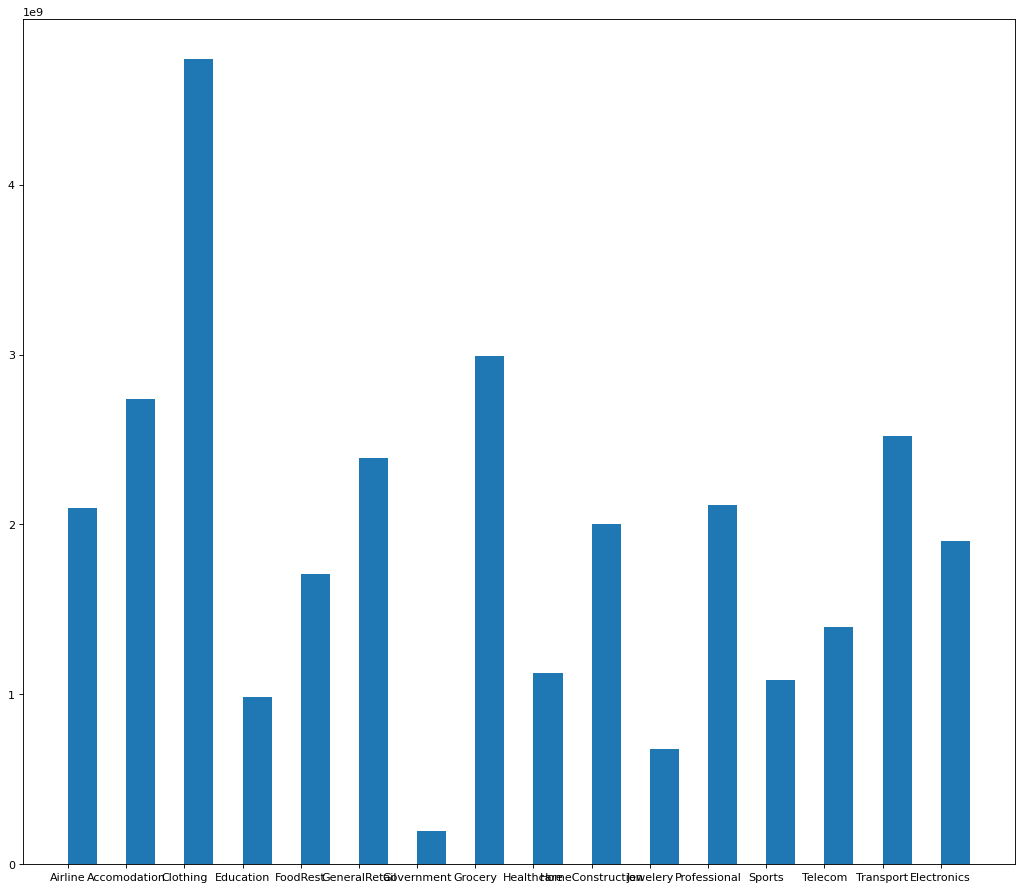

<Figure size 432x288 with 0 Axes>

In [315]:
#We need to get the count and amount of each merchant and sort them to determine the top merchants
# This is done to determine which merchants' relations are going to be over as of now on
names = list(df_mg_data_dict.keys())
values = list(df_mg_data_dict.values())
count_names=[]
for name in  names[2:18]: 
    length = len(name)
    temp_name = name [7:len(name)-2]
    count_names.append(temp_name)
print (count_names)

label_names= ['Airline', 'Accomodation', 'Clothing', 'Education', 'FoodRest',\
              'GeneralRetail', 'Government', 'Grocery', 'Healthcare',\
              'HomeConstruction', 'Jewelery', 'Professional',\
              'Sports', 'Telecom', 'Transport', 'Electronics']

plt.figure(figsize=(16, 14), dpi=80)
print (len(df_mg_data_dict))
plt.bar(range(16), values[2:18], tick_label=label_names, width=0.5)
plt.show()
plt.savefig('mine.png')

plt.figure(figsize=(16, 14), dpi=80)
plt.bar(range(16), values[18:34], tick_label=label_names, align='edge', width=0.5)
plt.show()
plt.savefig('amount_mg.png')

In [226]:
# This printing helped us cluster the merchants to four groups
# For instance: 'high count high amount' can be {'transport', 'Electronics', ...}
# For instance: 'low count low amount' can be {'GovernmentLegal', 'Jewelery', ...}

df_mg_counts_dict= dict(list(df_mg_data_dict.items())[2:18])
sorted_df_mg_counts_dict = dict(sorted(df_mg_counts_dict.items(), key=lambda item: item[1]))
print (sorted_df_mg_counts_dict)
print("\n\n")
df_mg_amounts_dict= dict(list(df_mg_data_dict.items())[18:34])
sorted_df_mg_amounts_dict = dict(sorted(df_mg_amounts_dict.items(), key=lambda item: item[1]))
print (sorted_df_mg_amounts_dict)
print("\n\n")

print(df_mg_data_dict)
print("\n\n")

print(sorted_df_mg_counts_dict.keys())
print("\n\n")
print(sorted_df_mg_amounts_dict.keys())

{'Count.*GovernmentLegal.*': 101283.0, 'Count.*Jewelery.*': 147585.0, 'Count.*Education.*': 208546.0, 'Count.*Airline.*': 366927.0, 'Count.*HomeConstruction.*': 585879.0, 'Count.*Electronics.*': 745260.0, 'Count.*Accomodation.*': 753395.0, 'Count.*Healthcare.*': 1344289.0, 'Count.*Sports_and_Leisure.*': 1618400.0, 'Count.*GeneralRetail.*': 2186398.0, 'Count.*TelecomServices.*': 2307842.0, 'Count.*Professional_and_CommercialServices.*': 2564931.0, 'Count.*FoodStoresRestaurants.*': 4318256.0, 'Count.*Clothing_and_Apparel.*': 4437430.0, 'Count.*GroceryStoresSupermarkets.*': 6684703.0, 'Count.*Transport.*': 9985123.0}



{'Amount.*GovernmentLegal.*': 192885889.0, 'Amount.*Jewelery.*': 680968594.0, 'Amount.*Education.*': 982661373.0, 'Amount.*Sports_and_Leisure.*': 1082214152.0, 'Amount.*Healthcare.*': 1123775354.0, 'Amount.*TelecomServices.*': 1395496036.0, 'Amount.*FoodStoresRestaurants.*': 1705592178.0, 'Amount.*Electronics.*': 1900412385.0, 'Amount.*HomeConstruction.*': 2000628437.0, 'A

In [228]:
# We need to graph now the relation between the total cash amount  vs total retail amount  
# for all quarters
reg= 'Amount_of.*|^CUSTOMER_ID|^CARD_ID'
df_filter_merch = df.filter(regex=reg)
df_filter_merch.tail(30)

,CUSTOMER_ID,CARD_ID,Amount_of_Airline_Q1_Y1,Amount_of_Airline_Q2_Y1,Amount_of_Airline_Q3_Y1,Amount_of_Airline_Q4_Y1,Amount_of_Accomodation_Q1_Y1,Amount_of_Accomodation_Q2_Y1,Amount_of_Accomodation_Q3_Y1,Amount_of_Accomodation_Q4_Y1,...,Amount_of_TelecomServices_Q3_Y2,Amount_of_TelecomServices_Q4_Y2,Amount_of_Transport_Q1_Y2,Amount_of_Transport_Q2_Y2,Amount_of_Transport_Q3_Y2,Amount_of_Transport_Q4_Y2,Amount_of_Electronics_Q1_Y2,Amount_of_Electronics_Q2_Y2,Amount_of_Electronics_Q3_Y2,Amount_of_Electronics_Q4_Y2
143946,48306,143947,0.0,0.0,0.0,0.0,0.0,15951.0,3981.0,6288.0,...,0.0,0.0,0.0,7743.0,3681.0,0.0,1419.0,0.0,0.0,0.0
143947,123236,143948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143948,123237,143949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,49.0,86.0,0.0,96.0,0.0,629.0,0.0,251.0
143949,70601,143950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5274.0,0.0,6000.0,0.0,0.0,0.0,4368.0,0.0
143950,89459,143951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2073.0,2973.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143951,123238,143952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143952,123239,143953,0.0,0.0,0.0,12084.0,0.0,0.0,2100.0,85284.0,...,9510.0,52790.0,39324.0,25054.0,25888.0,28130.0,0.0,7372.0,49700.0,15398.0
143953,123240,143954,0.0,0.0,0.0,0.0,0.0,0.0,7392.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,26000.0,9472.0,0.0,0.0
143954,123241,143955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143955,123242,143956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37950.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [266]:
#Getting the sum of all MGs for each customer to provide a rank for each one of them per customer to be used later
L = ['CUSTOMER_ID', 'CARD_ID',\
     'Amount.*Airline.*', 'Amount.*Accomodation.*', 'Amount.*Clothing_and_Apparel.*', 'Amount.*Education.*',\
     'Amount.*FoodStoresRestaurants.*', 'Amount.*GeneralRetail.*', 'Amount.*GovernmentLegal.*', 'Amount.*GroceryStoresSupermarkets.*',\
     'Amount.*Healthcare.*', 'Amount.*HomeConstruction.*', 'Amount.*Jewelery.*', 'Amount.*Professional_and_CommercialServices.*',\
     'Amount.*Sports_and_Leisure.*', 'Amount.*TelecomServices.*', 'Amount.*Transport.*', 'Amount.*Electronics.*']
df_filter_amounts_sum_mg = pd.DataFrame({x: df_filter_merch.filter(regex=x).sum(axis=1) for x in L})
df_filter_amounts_sum_mg.head()

,CUSTOMER_ID,CARD_ID,Amount.*Airline.*,Amount.*Accomodation.*,Amount.*Clothing_and_Apparel.*,Amount.*Education.*,Amount.*FoodStoresRestaurants.*,Amount.*GeneralRetail.*,Amount.*GovernmentLegal.*,Amount.*GroceryStoresSupermarkets.*,Amount.*Healthcare.*,Amount.*HomeConstruction.*,Amount.*Jewelery.*,Amount.*Professional_and_CommercialServices.*,Amount.*Sports_and_Leisure.*,Amount.*TelecomServices.*,Amount.*Transport.*,Amount.*Electronics.*
0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9640.0,0.0,0.0
1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8800.0,0.0,0.0
2,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,0.0,0.0,0.0,0.0,0.0,2434.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5745.0


# New Metric:
    We provided a new metric to measure loyalty of each customer to each one of the MG. We decided that we should know what is the percentage that the customer is paying above average to each MG. If he/she does not pay anything, the percentage will be -1. We converted all -1s to Nan values later to not affect the rank. Then we used these ranks to produce 16 clusters, one per MG. The customer is eligible to join the cluster if he/she ranked that MG as 1 or 2 or 3 or 4. Keeping this in mind, each customer will join up to 4 MGs. This can be used later to provide customized offers and ads to these all the MGs chosen by the user (ranked as 1-4) when we are dealing with any customer. This will have high probability to use their credit cards more when they have the offer of more payback for this particular MG. Given that clusters are not numerically, they are rather categorical, we decided to provide it in the simplest form possible, which is a text file, easy to scrape to customize ads and offers. We dumped the content of 16 clusters to 'MG_clusters.txt'

In [267]:

Airline_mean= df_filter_amounts_sum_mg ['Amount.*Airline.*'].mean()
df_filter_amounts_sum_mg ['Amount.*Airline.*'] = (df_filter_amounts_sum_mg ['Amount.*Airline.*'] - Airline_mean) / Airline_mean

Accomodation_mean= df_filter_amounts_sum_mg ['Amount.*Accomodation.*'].mean()
df_filter_amounts_sum_mg ['Amount.*Accomodation.*'] = (df_filter_amounts_sum_mg ['Amount.*Accomodation.*'] - Accomodation_mean) / Accomodation_mean

Clothing_and_Apparel_mean= df_filter_amounts_sum_mg ['Amount.*Clothing_and_Apparel.*'].mean()
df_filter_amounts_sum_mg ['Amount.*Clothing_and_Apparel.*'] = (df_filter_amounts_sum_mg ['Amount.*Clothing_and_Apparel.*'] - Clothing_and_Apparel_mean) / Clothing_and_Apparel_mean

Education_mean= df_filter_amounts_sum_mg ['Amount.*Education.*'].mean()
df_filter_amounts_sum_mg ['Amount.*Education.*'] = (df_filter_amounts_sum_mg ['Amount.*Education.*'] - Education_mean) / Education_mean

FoodStoresRestaurants_mean= df_filter_amounts_sum_mg ['Amount.*FoodStoresRestaurants.*'].mean()
df_filter_amounts_sum_mg ['Amount.*FoodStoresRestaurants.*'] = (df_filter_amounts_sum_mg ['Amount.*FoodStoresRestaurants.*'] - FoodStoresRestaurants_mean) / FoodStoresRestaurants_mean

GeneralRetail_mean= df_filter_amounts_sum_mg ['Amount.*GeneralRetail.*'].mean()
df_filter_amounts_sum_mg ['Amount.*GeneralRetail.*'] = (df_filter_amounts_sum_mg ['Amount.*GeneralRetail.*'] - GeneralRetail_mean) / GeneralRetail_mean

GovernmentLegal_mean= df_filter_amounts_sum_mg ['Amount.*GovernmentLegal.*'].mean()
df_filter_amounts_sum_mg ['Amount.*GovernmentLegal.*'] = (df_filter_amounts_sum_mg ['Amount.*GovernmentLegal.*'] - GovernmentLegal_mean) / GovernmentLegal_mean

GroceryStoresSupermarkets_mean= df_filter_amounts_sum_mg ['Amount.*GroceryStoresSupermarkets.*'].mean()
df_filter_amounts_sum_mg ['Amount.*GroceryStoresSupermarkets.*'] = (df_filter_amounts_sum_mg ['Amount.*GroceryStoresSupermarkets.*'] - GroceryStoresSupermarkets_mean) / GroceryStoresSupermarkets_mean

Healthcare_mean= df_filter_amounts_sum_mg ['Amount.*Healthcare.*'].mean()
df_filter_amounts_sum_mg ['Amount.*Healthcare.*'] = (df_filter_amounts_sum_mg ['Amount.*Healthcare.*'] - Healthcare_mean) / Healthcare_mean

HomeConstruction_mean= df_filter_amounts_sum_mg ['Amount.*HomeConstruction.*'].mean()
df_filter_amounts_sum_mg ['Amount.*HomeConstruction.*'] = (df_filter_amounts_sum_mg ['Amount.*HomeConstruction.*'] - HomeConstruction_mean) / HomeConstruction_mean

Jewelery_mean= df_filter_amounts_sum_mg ['Amount.*Jewelery.*'].mean()
df_filter_amounts_sum_mg ['Amount.*Jewelery.*'] = (df_filter_amounts_sum_mg ['Amount.*Jewelery.*'] - Jewelery_mean) / Jewelery_mean

Professional_and_CommercialServices_mean= df_filter_amounts_sum_mg ['Amount.*Professional_and_CommercialServices.*'].mean()
df_filter_amounts_sum_mg ['Amount.*Professional_and_CommercialServices.*'] = (df_filter_amounts_sum_mg ['Amount.*Professional_and_CommercialServices.*'] - Professional_and_CommercialServices_mean) / Professional_and_CommercialServices_mean

Sports_and_Leisure_mean= df_filter_amounts_sum_mg ['Amount.*Sports_and_Leisure.*'].mean()
df_filter_amounts_sum_mg ['Amount.*Sports_and_Leisure.*'] = (df_filter_amounts_sum_mg ['Amount.*Sports_and_Leisure.*'] - Sports_and_Leisure_mean) / Sports_and_Leisure_mean

TelecomServices_mean= df_filter_amounts_sum_mg ['Amount.*TelecomServices.*'].mean()
df_filter_amounts_sum_mg ['Amount.*TelecomServices.*'] = (df_filter_amounts_sum_mg ['Amount.*TelecomServices.*'] - TelecomServices_mean) / TelecomServices_mean

Transport_mean= df_filter_amounts_sum_mg ['Amount.*Transport.*'].mean()
df_filter_amounts_sum_mg ['Amount.*Transport.*'] = (df_filter_amounts_sum_mg ['Amount.*Transport.*'] - Transport_mean) / Transport_mean

Electronics_mean= df_filter_amounts_sum_mg ['Amount.*Electronics.*'].mean()
df_filter_amounts_sum_mg ['Amount.*Electronics.*'] = (df_filter_amounts_sum_mg ['Amount.*Electronics.*'] - Electronics_mean) / Electronics_mean


df_filter_amounts_sum_mg.tail(30)

,CUSTOMER_ID,CARD_ID,Amount.*Airline.*,Amount.*Accomodation.*,Amount.*Clothing_and_Apparel.*,Amount.*Education.*,Amount.*FoodStoresRestaurants.*,Amount.*GeneralRetail.*,Amount.*GovernmentLegal.*,Amount.*GroceryStoresSupermarkets.*,Amount.*Healthcare.*,Amount.*HomeConstruction.*,Amount.*Jewelery.*,Amount.*Professional_and_CommercialServices.*,Amount.*Sports_and_Leisure.*,Amount.*TelecomServices.*,Amount.*Transport.*,Amount.*Electronics.*
143946,48306,143947,0.053067,3.098609,1.269808,-1.000000,19.347508,0.285522,-1.000000,2.967638,13.584712,-0.772661,-1.000000,1.113095,-0.119153,1.627170,1.632701,0.678017
143947,123236,143948,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
143948,123237,143949,-1.000000,-1.000000,0.015495,-0.663012,-0.644448,-0.934071,-1.000000,-0.916334,-1.000000,-0.631753,-1.000000,-1.000000,-0.993614,-0.345065,-0.973800,-0.077693
143949,70601,143950,-1.000000,-1.000000,0.447305,-1.000000,-0.434763,-1.000000,-1.000000,-0.344428,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.738769,-0.356466,-0.669079
143950,89459,143951,-1.000000,-1.000000,-0.759299,-1.000000,-0.978474,-0.192959,-0.865642,3.101437,-1.000000,-1.000000,-1.000000,-0.460148,0.092777,0.442653,-0.987499,-0.902496
143951,123238,143952,-1.000000,-1.000000,-0.922378,-1.000000,-0.977039,-0.852247,-1.000000,-0.288234,-1.000000,-0.298769,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
143952,123239,143953,7.686053,12.891914,1.915990,99.238311,2.595702,1.688451,47.225412,-0.699109,-0.951828,4.426766,-1.000000,1.340040,2.781749,28.748590,15.444190,5.286749
143953,123240,143954,-1.000000,-0.513299,2.028719,-1.000000,-0.552268,1.581038,-1.000000,0.648696,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.668612,-1.000000,4.465961
143954,123241,143955,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.740629,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
143955,123242,143956,2.126616,2.469717,-0.684653,-1.000000,-1.000000,-0.829488,21.873630,-0.710367,-0.887769,-1.000000,-0.158516,-0.617248,1.773584,-1.000000,-1.000000,-1.000000


In [263]:
# df_filter_amounts_sum_mg.to_csv(r'.\amounts_sum_mg_averages_percentage.csv', index = False, header=True)
# df_filter_amounts_sum_mg.to_csv(r'.\amounts_sum_mg.csv', index = False, header=True)

In [269]:
df_filter_amounts_sum_mg_noid= df_filter_amounts_sum_mg.drop(columns= ["CUSTOMER_ID", "CARD_ID"])
df_filter_amounts_sum_mg_noid.head()

,Amount.*Airline.*,Amount.*Accomodation.*,Amount.*Clothing_and_Apparel.*,Amount.*Education.*,Amount.*FoodStoresRestaurants.*,Amount.*GeneralRetail.*,Amount.*GovernmentLegal.*,Amount.*GroceryStoresSupermarkets.*,Amount.*Healthcare.*,Amount.*HomeConstruction.*,Amount.*Jewelery.*,Amount.*Professional_and_CommercialServices.*,Amount.*Sports_and_Leisure.*,Amount.*TelecomServices.*,Amount.*Transport.*,Amount.*Electronics.*
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.005423,-1.0,-1.000000
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.092087,-1.0,-1.000000
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000
3,-1.0,-1.0,-1.0,-1.0,-1.0,-0.853451,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.564757


In [276]:
df_filter_amounts_sum_mg_noid.replace(-1, np.nan, inplace=True)
df_filter_amounts_sum_mg_noid.head()

,Amount.*Airline.*,Amount.*Accomodation.*,Amount.*Clothing_and_Apparel.*,Amount.*Education.*,Amount.*FoodStoresRestaurants.*,Amount.*GeneralRetail.*,Amount.*GovernmentLegal.*,Amount.*GroceryStoresSupermarkets.*,Amount.*Healthcare.*,Amount.*HomeConstruction.*,Amount.*Jewelery.*,Amount.*Professional_and_CommercialServices.*,Amount.*Sports_and_Leisure.*,Amount.*TelecomServices.*,Amount.*Transport.*,Amount.*Electronics.*
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005423,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.092087,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,-0.853451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.564757


In [277]:
df_filter_amounts_sum_mg_ranked=df_filter_amounts_sum_mg_noid.rank(1, ascending=False, method='first')

In [294]:
df_filter_amounts_sum_mg_ranked [['CUSTOMER_ID']] = df_filter_amounts_sum_mg ['CUSTOMER_ID']
df_filter_amounts_sum_mg_ranked [['CARD_ID']] = df_filter_amounts_sum_mg ['CARD_ID']

In [297]:
# reordering the columuns in the folowing order
df_filter_amounts_sum_mg_ranked = df_filter_amounts_sum_mg_ranked[['CUSTOMER_ID', 'CARD_ID', 'Amount.*Airline.*', 'Amount.*Accomodation.*', 'Amount.*Clothing_and_Apparel.*', 'Amount.*Education.*',\
     'Amount.*FoodStoresRestaurants.*', 'Amount.*GeneralRetail.*', 'Amount.*GovernmentLegal.*', 'Amount.*GroceryStoresSupermarkets.*',\
     'Amount.*Healthcare.*', 'Amount.*HomeConstruction.*', 'Amount.*Jewelery.*', 'Amount.*Professional_and_CommercialServices.*',\
     'Amount.*Sports_and_Leisure.*', 'Amount.*TelecomServices.*', 'Amount.*Transport.*', 'Amount.*Electronics.*']]

In [298]:
df_filter_amounts_sum_mg_ranked.tail(30)

,CUSTOMER_ID,CARD_ID,Amount.*Airline.*,Amount.*Accomodation.*,Amount.*Clothing_and_Apparel.*,Amount.*Education.*,Amount.*FoodStoresRestaurants.*,Amount.*GeneralRetail.*,Amount.*GovernmentLegal.*,Amount.*GroceryStoresSupermarkets.*,Amount.*Healthcare.*,Amount.*HomeConstruction.*,Amount.*Jewelery.*,Amount.*Professional_and_CommercialServices.*,Amount.*Sports_and_Leisure.*,Amount.*TelecomServices.*,Amount.*Transport.*,Amount.*Electronics.*
143946,48306,143947,11.0,3.0,7.0,NaN,1.0,10.0,NaN,4.0,2.0,13.0,NaN,8.0,12.0,6.0,5.0,9.0
143947,123236,143948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143948,123237,143949,NaN,NaN,1.0,6.0,5.0,8.0,NaN,7.0,NaN,4.0,NaN,NaN,10.0,3.0,9.0,2.0
143949,70601,143950,NaN,NaN,1.0,NaN,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,6.0,3.0,5.0
143950,89459,143951,NaN,NaN,6.0,NaN,9.0,4.0,7.0,1.0,NaN,NaN,NaN,5.0,3.0,2.0,10.0,8.0
143951,123238,143952,NaN,NaN,4.0,NaN,5.0,3.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
143952,123239,143953,6.0,5.0,11.0,1.0,10.0,12.0,2.0,14.0,15.0,8.0,NaN,13.0,9.0,3.0,4.0,7.0
143953,123240,143954,NaN,5.0,2.0,NaN,6.0,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,1.0
143954,123241,143955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143955,123242,143956,3.0,2.0,7.0,NaN,NaN,9.0,1.0,8.0,10.0,NaN,5.0,6.0,4.0,NaN,NaN,NaN


In [300]:
# df_filter_amounts_sum_mg_ranked.to_csv(r'.\amounts_sum_mg_averages_ranked.csv', index = False, header=True)

In [308]:
#Given the ranks, we will cluster the customer based on their fav merchant
# Any customer with from [ 1 - 4 ] rank will be in this particular merchant group cluster
# Any given customer will be in up to four clusters at the same time
def append_vendor_dict (df_filter_amounts_sum_mg_ranked, parameter, behav_segment_customers, dict_name):
    temp_dict = {}
    df_filter_amounts_mg_ranked_parameter = df_filter_amounts_sum_mg_ranked [df_filter_amounts_sum_mg_ranked[parameter]<5]
    temp_dict ['CUSTOMER_ID']= df_filter_amounts_mg_ranked_parameter['CUSTOMER_ID'].tolist()
    temp_dict ['CARD_ID']= df_filter_amounts_mg_ranked_parameter['CARD_ID'].tolist()
    behav_segment_customers[dict_name] = temp_dict

In [313]:
behav_segment_customers = {}

dict_names = ['Airline', 'Accomodation', 'Clothing', 'Education', 'FoodRest',\
              'GeneralRetail', 'Government', 'Grocery', 'Healthcare',\
              'HomeConstruction', 'Jewelery', 'Professional',\
              'Sports', 'Telecom', 'Transport', 'Electronics']

parameter_list = ['Amount.*Airline.*', 'Amount.*Accomodation.*', 'Amount.*Clothing_and_Apparel.*', 'Amount.*Education.*',\
     'Amount.*FoodStoresRestaurants.*', 'Amount.*GeneralRetail.*', 'Amount.*GovernmentLegal.*', 'Amount.*GroceryStoresSupermarkets.*',\
     'Amount.*Healthcare.*', 'Amount.*HomeConstruction.*', 'Amount.*Jewelery.*', 'Amount.*Professional_and_CommercialServices.*',\
     'Amount.*Sports_and_Leisure.*', 'Amount.*TelecomServices.*', 'Amount.*Transport.*', 'Amount.*Electronics.*']

#creating clusters based on favourite merchants
i=0
while i < len(parameter_list):
    append_vendor_dict (df_filter_amounts_sum_mg_ranked, parameter_list[i], behav_segment_customers, dict_names[i])
    i=i+1

# #writing clusters into a file
# f = open("clusters.txt", "a")
# f.write(str(behav_segment_customers))
# f.close()
behav_segment_customers

{'Airline': {'CUSTOMER_ID': [12,
   17,
   22,
   25,
   44,
   47,
   69,
   77,
   81,
   111,
   138,
   139,
   143,
   146,
   156,
   177,
   185,
   189,
   198,
   213,
   217,
   231,
   249,
   286,
   290,
   296,
   298,
   300,
   309,
   310,
   355,
   361,
   365,
   376,
   382,
   410,
   430,
   433,
   437,
   443,
   452,
   454,
   465,
   496,
   497,
   515,
   518,
   521,
   524,
   549,
   552,
   553,
   556,
   558,
   561,
   575,
   576,
   577,
   592,
   595,
   596,
   605,
   606,
   624,
   629,
   634,
   659,
   660,
   674,
   688,
   698,
   705,
   709,
   716,
   764,
   780,
   782,
   795,
   813,
   838,
   840,
   841,
   843,
   887,
   904,
   905,
   946,
   950,
   952,
   960,
   981,
   994,
   995,
   998,
   1016,
   1026,
   1047,
   1052,
   1075,
   1082,
   1094,
   1103,
   1109,
   1113,
   1126,
   1140,
   1142,
   1156,
   1168,
   1179,
   1186,
   1215,
   1220,
   1242,
   1244,
   1267,
   1270,
   1278,
   1284,
   129